In [1]:
import db_dtypes
import matplotlib.pyplot as plt
import os
import pandas as pd
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import seaborn as sns

In [2]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [3]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [4]:
query_job = bigquery_client.query(query)
unemployment_data = query_job.to_dataframe()

In [5]:
unemployment_data = unemployment_data.drop_duplicates()

In [6]:
unemployment_data = unemployment_data.fillna(0, inplace=True)

In [7]:
unemployment_data.columns

AttributeError: 'NoneType' object has no attribute 'columns'

In [8]:
unemployment_data

In [9]:
unemployment_data

In [10]:
len(unemployment_data)

TypeError: object of type 'NoneType' has no len()

In [11]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [12]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [13]:
query_job = bigquery_client.query(query)
unemployment_data = query_job.to_dataframe()

In [14]:
unemployment_data = unemployment_data.drop_duplicates()

In [15]:
unemployment_data

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,<NA>,<NA>,0,0,<NA>,10,0,0,<NA>,<NA>
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,90,65,0,0,0,135,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16827,6d4dc6590c52c9b265d5003bf90ddbbb,20220423,17,18063,210607,"Census Tract 2106.07, Hendricks County, Indiana",13,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,0,<NA>,<NA>
16828,f35320206f3dd1ffc411e4ac127caf92,20220618,25,18163,3804,"Census Tract 38.04, Vanderburgh County, Indiana",21,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,<NA>,<NA>,0,<NA>,14
16829,f35320206f3dd1ffc411e4ac127caf92,20220827,35,18163,3804,"Census Tract 38.04, Vanderburgh County, Indiana",22,0,<NA>,13,...,<NA>,<NA>,0,0,0,<NA>,<NA>,0,<NA>,<NA>
16831,bbcb018f0e5e49e13636f6e78ce9f60f,20220326,13,18163,10203,"Census Tract 102.03, Vanderburgh County, Indiana",53,0,<NA>,48,...,<NA>,<NA>,0,0,0,<NA>,<NA>,0,0,<NA>


In [16]:
unemployment_data.fillna(0, inplace=True)

In [17]:
len(unemployment_data)

13977

In [18]:
unemployment_data

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,0,14,...,0,0,0,0,0,11,0,0,0,0
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,0,108,...,76,35,0,0,0,0,0,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,0,0,...,0,0,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,0,0,...,0,0,0,0,0,10,0,0,0,0
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,0,69,...,90,65,0,0,0,135,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16827,6d4dc6590c52c9b265d5003bf90ddbbb,20220423,17,18063,210607,"Census Tract 2106.07, Hendricks County, Indiana",13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16828,f35320206f3dd1ffc411e4ac127caf92,20220618,25,18163,3804,"Census Tract 38.04, Vanderburgh County, Indiana",21,0,0,0,...,0,0,0,0,0,0,0,0,0,14
16829,f35320206f3dd1ffc411e4ac127caf92,20220827,35,18163,3804,"Census Tract 38.04, Vanderburgh County, Indiana",22,0,0,13,...,0,0,0,0,0,0,0,0,0,0
16831,bbcb018f0e5e49e13636f6e78ce9f60f,20220326,13,18163,10203,"Census Tract 102.03, Vanderburgh County, Indiana",53,0,0,48,...,0,0,0,0,0,0,0,0,0,0


In [19]:
unemployment_data = unemployment_data.filter(['uu_id', 'week_number','total_claims','edu_8th_or_less', 'edu_grades_9_11',
       'edu_hs_grad_equiv', 'edu_post_hs','race_amerindian', 'race_asian', 'race_black','race_white'])

In [20]:
unemployment_data.isnull().sum()

uu_id                0
week_number          0
total_claims         0
edu_8th_or_less      0
edu_grades_9_11      0
edu_hs_grad_equiv    0
edu_post_hs          0
race_amerindian      0
race_asian           0
race_black           0
race_white           0
dtype: int64

In [21]:
unemployment_data = unemployment_data.sort_values(by=['uu_id','week_number']).reset_index()

In [22]:
unemployment_data = unemployment_data.drop('index', axis=1)

In [23]:
unemployment_data.head()

,uu_id,week_number,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white
0,001cd9ae23064d7f0fd3cd327c873d8d,31,34,0,0,30,0,0,0,0,34
1,001cd9ae23064d7f0fd3cd327c873d8d,33,10,0,0,0,0,0,0,0,10
2,001cd9ae23064d7f0fd3cd327c873d8d,34,25,0,0,0,0,0,0,0,0
3,001cd9ae23064d7f0fd3cd327c873d8d,35,10,0,0,0,0,0,0,0,0
4,001cd9ae23064d7f0fd3cd327c873d8d,36,10,0,0,0,0,0,0,0,0


In [24]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    return result.head()

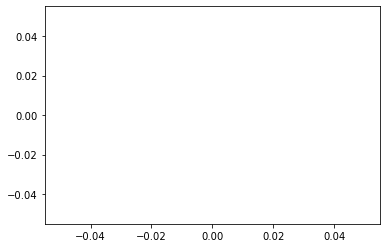

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [25]:
predict_claims('00d85dff1c1f21f01f4f5f0bd683d32b')

In [26]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test.sort_values(by = 'week_number')
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.total_claims
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

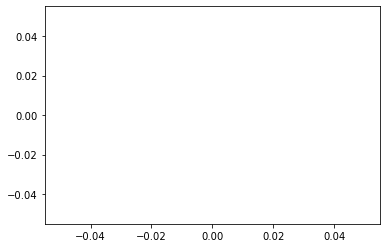

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [27]:
predict_claims('00d85dff1c1f21f01f4f5f0bd683d32b')

In [28]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test.sort_values(by = 'week_number')
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

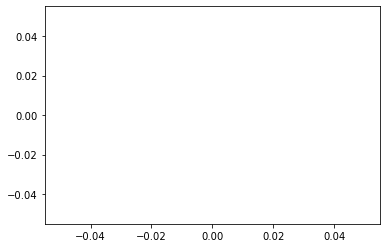

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [29]:
predict_claims('00d85dff1c1f21f01f4f5f0bd683d32b')

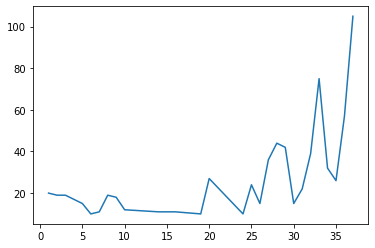

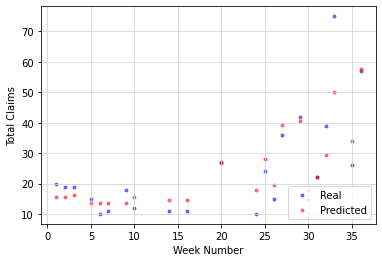

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
6,1,0,0,0,0,0,0,0,0,20,57.5
7,2,0,0,0,0,0,0,0,0,19,50.2
8,3,0,0,10,0,0,0,0,19,19,34.0
9,5,0,0,0,0,0,0,0,15,15,22.3
10,6,0,0,0,0,0,0,0,10,10,14.5


In [30]:
predict_claims('005be9532fd717dc36d4be318fd9ad25')

In [31]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test.sort_values(by = 'week_number')
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.plot(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.plot(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

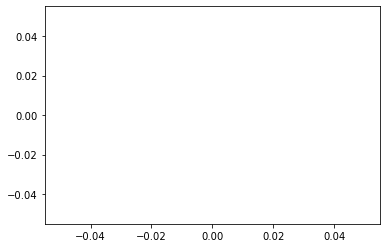

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [32]:
predict_claims('00d85dff1c1f21f01f4f5f0bd683d32b')

In [33]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    X_test = X_test.sort_values(by = 'week_number')
    
    x_axis = X_test.week_number
    
    plt.plot(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.plot(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

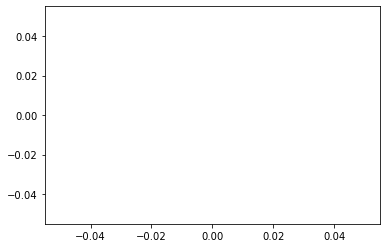

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [34]:
predict_claims('00d85dff1c1f21f01f4f5f0bd683d32b')

In [35]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    X_test = X_test.sort_values(by = 'week_number')
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    
    
    x_axis = X_test.week_number
    
    plt.plot(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.plot(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

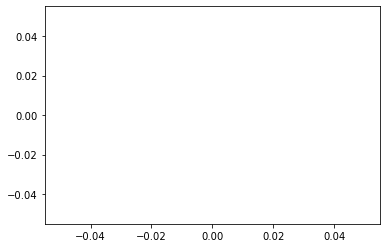

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [36]:
predict_claims('00d85dff1c1f21f01f4f5f0bd683d32b')

In [37]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    X_test = X_test.sort_values(by = 'week_number')
    y_test = y_test.sort_values(by = 'week_number')
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    
    
    x_axis = X_test.week_number
    
    plt.plot(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.plot(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

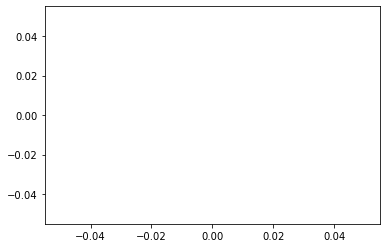

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [38]:
predict_claims('00d85dff1c1f21f01f4f5f0bd683d32b')

In [39]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    
    
    x_axis = X_test.week_number
    
    plt.plot(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.plot(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

In [40]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.plot(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.plot(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

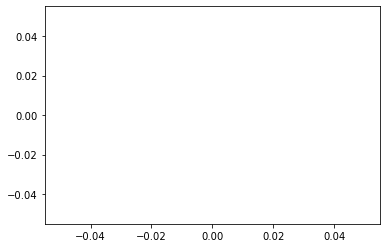

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [41]:
predict_claims('00d85dff1c1f21f01f4f5f0bd683d32b')

In [42]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

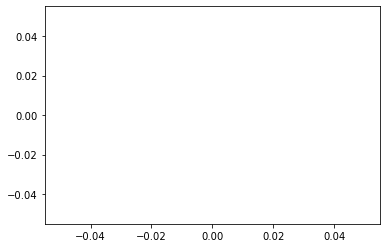

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [43]:
predict_claims('00d85dff1c1f21f01f4f5f0bd683d32b')

In [44]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    print(X_test)
    print(y_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

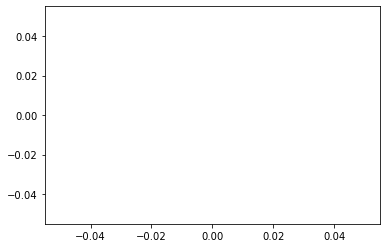

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [45]:
predict_claims('00d85dff1c1f21f01f4f5f0bd683d32b')

In [46]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

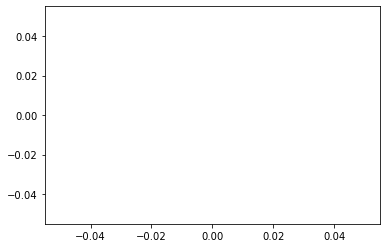

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [47]:
predict_claims('00d85dff1c1f21f01f4f5f0bd683d32b')

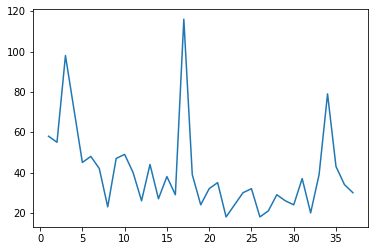

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/747271003.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/747271003.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['prediction'] = predictions.tolist()


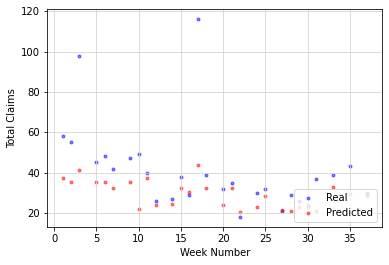

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
94,20,0,0,25,0,0,0,23,0,32,23.7
83,9,0,0,28,0,0,0,41,0,47,35.2
96,22,0,0,0,0,0,0,13,0,18,20.3
110,37,0,0,11,13,0,0,0,0,30,28.4
106,33,0,0,20,0,0,0,32,0,39,33.0


In [48]:
predict_claims('00f962ce727b8dbbf20925abd5a253dd')

In [49]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title(uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

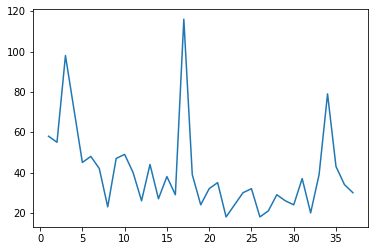

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1429589805.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1429589805.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['prediction'] = predictions.tolist()


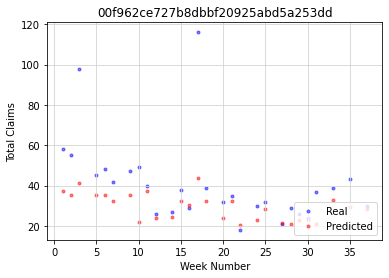

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
94,20,0,0,25,0,0,0,23,0,32,23.7
83,9,0,0,28,0,0,0,41,0,47,35.2
96,22,0,0,0,0,0,0,13,0,18,20.3
110,37,0,0,11,13,0,0,0,0,30,28.4
106,33,0,0,20,0,0,0,32,0,39,33.0


In [50]:
predict_claims('00f962ce727b8dbbf20925abd5a253dd')

In [53]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract:',uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

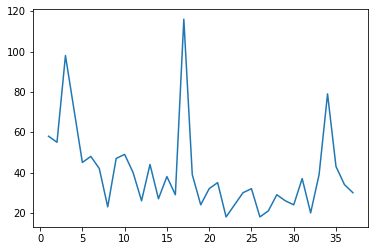

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/3777391259.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/3777391259.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['prediction'] = predictions.tolist()


ValueError: dictionary update sequence element #0 has length 1; 2 is required

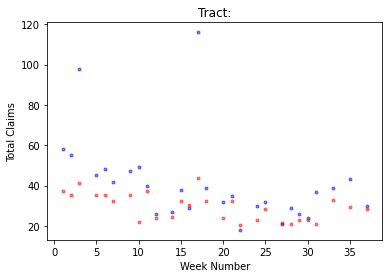

In [54]:
predict_claims('00f962ce727b8dbbf20925abd5a253dd')

In [55]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract:'+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

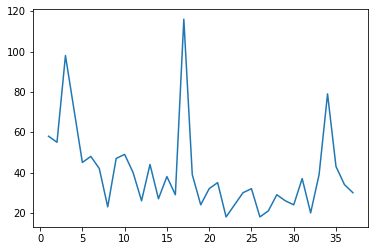

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/3708768469.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/3708768469.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['prediction'] = predictions.tolist()


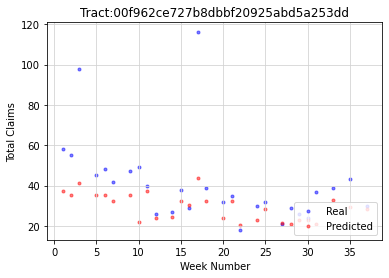

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
94,20,0,0,25,0,0,0,23,0,32,23.7
83,9,0,0,28,0,0,0,41,0,47,35.2
96,22,0,0,0,0,0,0,13,0,18,20.3
110,37,0,0,11,13,0,0,0,0,30,28.4
106,33,0,0,20,0,0,0,32,0,39,33.0


In [56]:
predict_claims('00f962ce727b8dbbf20925abd5a253dd')

In [57]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

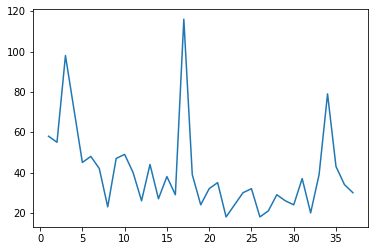

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1794196364.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1794196364.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['prediction'] = predictions.tolist()


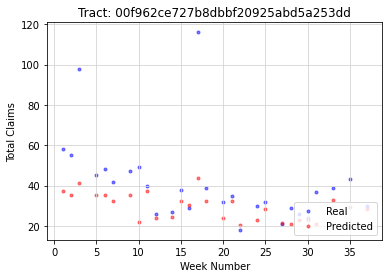

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
94,20,0,0,25,0,0,0,23,0,32,23.7
83,9,0,0,28,0,0,0,41,0,47,35.2
96,22,0,0,0,0,0,0,13,0,18,20.3
110,37,0,0,11,13,0,0,0,0,30,28.4
106,33,0,0,20,0,0,0,32,0,39,33.0


In [58]:
predict_claims('00f962ce727b8dbbf20925abd5a253dd')

In [59]:
uuids[:10]

NameError: name 'uuids' is not defined

In [60]:
uuids = unemployment_data.uu_id.unique()

In [61]:
uuids = unemployment_data.uu_id.unique()

In [62]:
uuids[:10]

array(['001cd9ae23064d7f0fd3cd327c873d8d',
       '005be9532fd717dc36d4be318fd9ad25',
       '007c1caccff1fbb3a0b8a10790f77141',
       '009683350b175edfc6414d664e4ba873',
       '00f962ce727b8dbbf20925abd5a253dd',
       '02a7b845ab6b3fc2c09a50cdc486db2a',
       '03ba3a9a63be1a5423457246f2846292',
       '050a624d618a68e43fe31189909c644f',
       '05298117cbe0fd69f04f89c83aaac091',
       '05f47cc80d60a67d61e891e2b90c2045'], dtype=object)

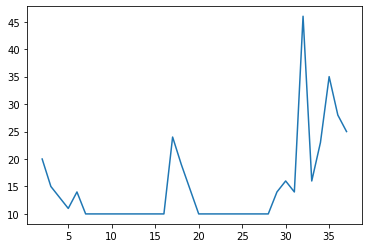

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1794196364.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1794196364.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['prediction'] = predictions.tolist()


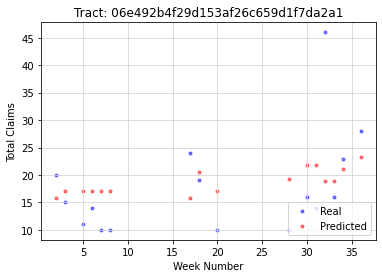

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
271,6,0,0,0,0,0,0,0,0,14,17.0
275,17,0,0,17,0,0,0,0,0,24,15.9
270,5,0,0,0,0,0,0,0,0,11,17.0
269,3,0,0,0,0,0,0,0,0,15,17.0
278,28,0,0,0,0,0,0,0,10,10,19.2


In [63]:
predict_claims('06e492b4f29d153af26c659d1f7da2a1')

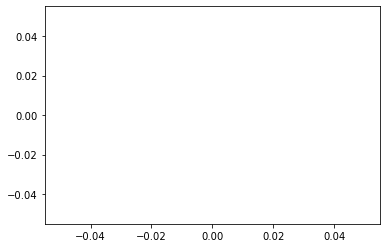

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [64]:
predict_claims('066fa7cc5a96dcdeca8485c68e2993b8')

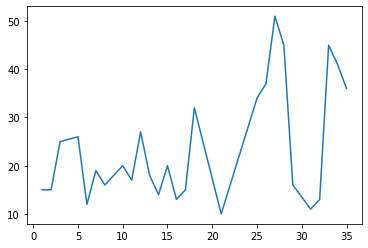

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1794196364.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1794196364.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['prediction'] = predictions.tolist()


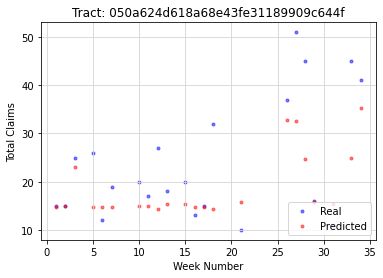

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
192,34,0,0,26,0,0,0,0,33,41,35.2
189,31,0,0,0,0,0,0,0,0,11,15.4
191,33,0,0,0,34,0,0,0,38,45,25.0
187,28,0,0,0,22,0,0,10,31,45,24.8
177,13,0,0,11,0,0,0,0,15,18,15.3


In [65]:
predict_claims('050a624d618a68e43fe31189909c644f')

In [66]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    print(x_axis)
    print(y_test)
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

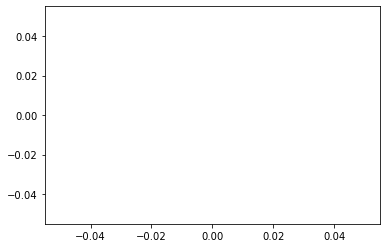

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [67]:
predict_claims('066fa7cc5a96dcdeca8485c68e2993b8')

In [68]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    print(x_axis)
    print(y_test)
    
    plt.scatter(x_axis.sort_values(), y_test.sort_values(), c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis.sort_values(), predictions.sort_values(), c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

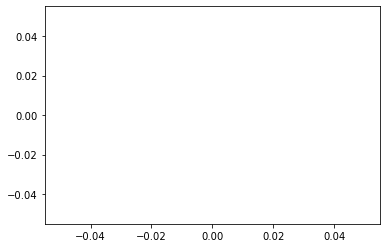

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [69]:
predict_claims('066fa7cc5a96dcdeca8485c68e2993b8')

In [70]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    print(x_axis)
    print(y_test)
    
    plt.scatter(x_axis.sort_values(), y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis.sort_values(), predictions.sort_values(), c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

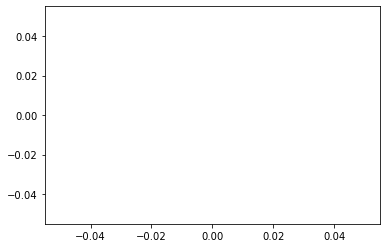

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [71]:
predict_claims('066fa7cc5a96dcdeca8485c68e2993b8')

In [72]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    print(x_axis)
    print(y_test)
    
    plt.scatter(x_axis.sort_values(), y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis.sort_values(), predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

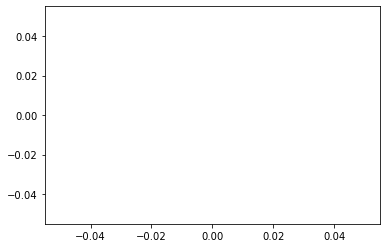

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [73]:
predict_claims('066fa7cc5a96dcdeca8485c68e2993b8')

In [74]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    print(x_axis)
    print(y_test)
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

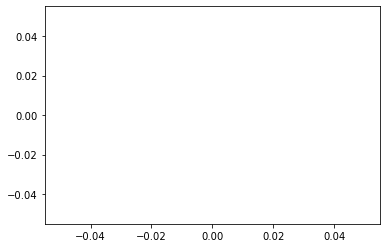

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [75]:
predict_claims('066fa7cc5a96dcdeca8485c68e2993b8')

In [76]:
def predict_claims(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

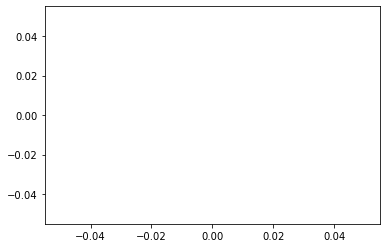

ValueError: With n_samples=0, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [77]:
predict_claims('066fa7cc5a96dcdeca8485c68e2993b8')

In [78]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    data.loc[len(data.index)] = [uuid, week, data.total_claims.median(), 0,0,0,0,0,0,0,0]
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.head()

In [79]:
predict_claims('066fa7cc5a96dcdeca8485c68e2993b8')

TypeError: predict_claims() missing 1 required positional argument: 'week'

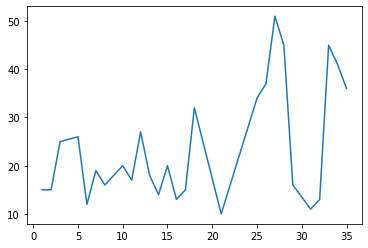

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/3361653420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[len(data.index)] = [uuid, week, data.total_claims.median(), 0,0,0,0,0,0,0,0]
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/3361653420.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/3361653420.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

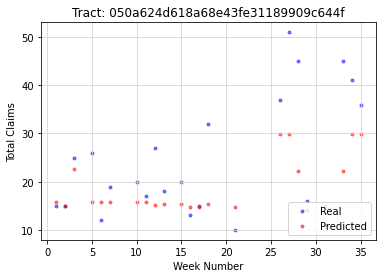

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
185,26,0,0,18,19,0,0,0,31,37.0,29.8
191,33,0,0,0,34,0,0,0,38,45.0,22.2
174,10,0,0,13,0,0,0,0,0,20.0,15.7
183,21,0,0,0,0,0,0,0,0,10.0,14.7
169,3,0,0,16,0,0,0,0,0,25.0,22.7


In [80]:
predict_claims('050a624d618a68e43fe31189909c644f', 38)

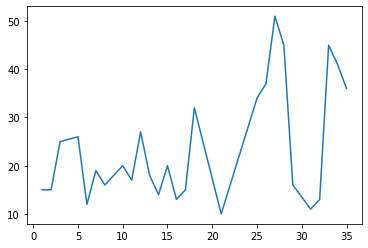

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/3361653420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[len(data.index)] = [uuid, week, data.total_claims.median(), 0,0,0,0,0,0,0,0]
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/3361653420.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/3361653420.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

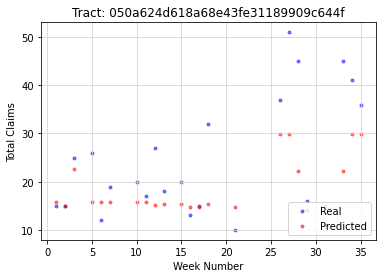

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
185,26,0,0,18,19,0,0,0,31,37.0,29.8
191,33,0,0,0,34,0,0,0,38,45.0,22.2
174,10,0,0,13,0,0,0,0,0,20.0,15.7
183,21,0,0,0,0,0,0,0,0,10.0,14.7
169,3,0,0,16,0,0,0,0,0,25.0,22.7


In [81]:
predict_claims('050a624d618a68e43fe31189909c644f', 39)

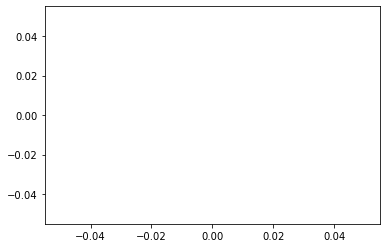

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/3361653420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[len(data.index)] = [uuid, week, data.total_claims.median(), 0,0,0,0,0,0,0,0]


ValueError: With n_samples=1, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [82]:
predict_claims('066fa7cc5a96dcdeca8485c68e2993b8',39)

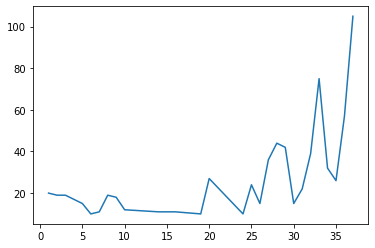

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/3361653420.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/3361653420.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['prediction'] = predictions.tolist()


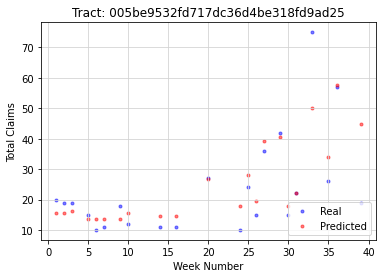

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
31,36,0,0,25,17,0,0,0,52,57,57.5
28,33,0,0,44,16,0,0,0,62,75,50.2
30,35,0,0,15,0,0,0,0,0,26,34.0
26,31,0,0,10,0,0,0,0,0,22,22.3
16,16,0,0,0,0,0,0,0,0,11,14.5


In [83]:
predict_claims('005be9532fd717dc36d4be318fd9ad25',39)

In [84]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    data.loc[len(data.index)] = [uuid, week, data.total_claims.median(), 0,0,0,0,0,0,0,0]
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result

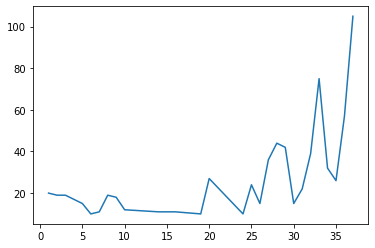

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/2985049510.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/2985049510.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['prediction'] = predictions.tolist()


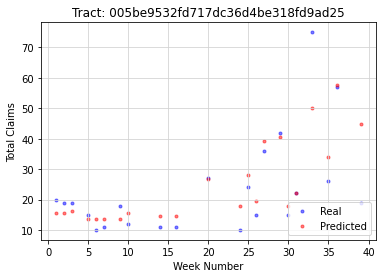

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
31,36,0,0,25,17,0,0,0,52,57,57.5
28,33,0,0,44,16,0,0,0,62,75,50.2
30,35,0,0,15,0,0,0,0,0,26,34.0
26,31,0,0,10,0,0,0,0,0,22,22.3
16,16,0,0,0,0,0,0,0,0,11,14.5
25,30,0,0,0,0,0,0,0,15,15,17.8
8,3,0,0,10,0,0,0,0,19,19,16.3
13,9,0,0,0,0,0,0,0,18,18,13.6
9,5,0,0,0,0,0,0,0,15,15,13.6
7,2,0,0,0,0,0,0,0,0,19,15.4


In [85]:
predict_claims('005be9532fd717dc36d4be318fd9ad25',39)

In [86]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    data.loc[len(data.index)] = [uuid, week, data.total_claims.median(), 0,0,0,0,0,0,0,0]
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

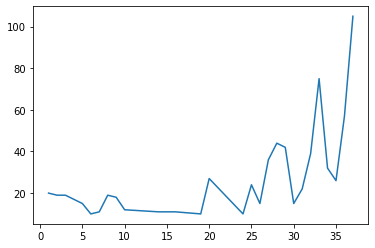

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/2977595233.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/2977595233.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['prediction'] = predictions.tolist()


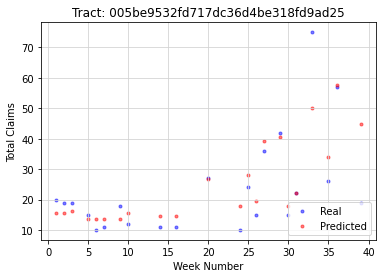

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
6,1,0,0,0,0,0,0,0,0,20,15.4
7,2,0,0,0,0,0,0,0,0,19,15.4
8,3,0,0,10,0,0,0,0,19,19,16.3
9,5,0,0,0,0,0,0,0,15,15,13.6
10,6,0,0,0,0,0,0,0,10,10,13.6
11,7,0,0,0,0,0,0,0,11,11,13.6
13,9,0,0,0,0,0,0,0,18,18,13.6
14,10,0,0,0,0,0,0,0,0,12,15.4
15,14,0,0,0,0,0,0,0,0,11,14.5
16,16,0,0,0,0,0,0,0,0,11,14.5


In [87]:
predict_claims('005be9532fd717dc36d4be318fd9ad25',39)

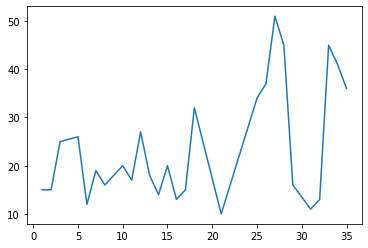

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/2977595233.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[len(data.index)] = [uuid, week, data.total_claims.median(), 0,0,0,0,0,0,0,0]
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/2977595233.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/2977595233.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

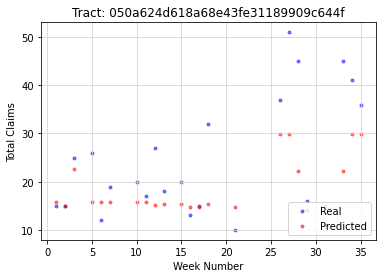

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
167,1,0,0,0,0,0,0,0,0,15.0,15.7
168,2,0,0,0,0,0,0,0,11,15.0,15.0
169,3,0,0,16,0,0,0,0,0,25.0,22.7
170,5,0,0,0,0,0,0,0,0,26.0,15.7
171,6,0,0,0,0,0,0,0,0,12.0,15.7
172,7,0,0,0,0,0,0,0,0,19.0,15.7
174,10,0,0,13,0,0,0,0,0,20.0,15.7
175,11,0,0,11,0,0,0,0,0,17.0,15.7
176,12,0,0,13,0,0,0,0,0,27.0,15.2
177,13,0,0,11,0,0,0,0,15,18.0,15.3


In [88]:
predict_claims('050a624d618a68e43fe31189909c644f', 39)

In [89]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid].copy()
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    data.loc[len(data.index)] = [uuid, week, data.total_claims.median(), 0,0,0,0,0,0,0,0]
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

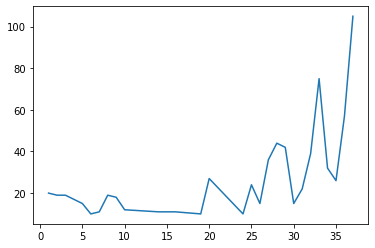

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/2046678817.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/2046678817.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['prediction'] = predictions.tolist()


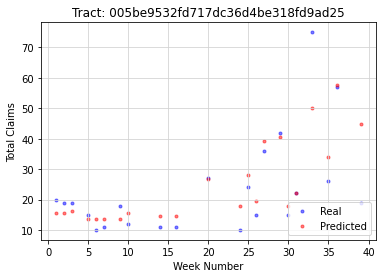

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
6,1,0,0,0,0,0,0,0,0,20,15.4
7,2,0,0,0,0,0,0,0,0,19,15.4
8,3,0,0,10,0,0,0,0,19,19,16.3
9,5,0,0,0,0,0,0,0,15,15,13.6
10,6,0,0,0,0,0,0,0,10,10,13.6
11,7,0,0,0,0,0,0,0,11,11,13.6
13,9,0,0,0,0,0,0,0,18,18,13.6
14,10,0,0,0,0,0,0,0,0,12,15.4
15,14,0,0,0,0,0,0,0,0,11,14.5
16,16,0,0,0,0,0,0,0,0,11,14.5


In [90]:
predict_claims('005be9532fd717dc36d4be318fd9ad25',39)

In [91]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid].copy()
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    data.loc[len(data)] = [uuid, week, data.total_claims.median(), 0,0,0,0,0,0,0,0]
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

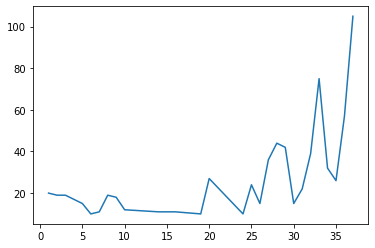

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/2992931453.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/2992931453.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['prediction'] = predictions.tolist()


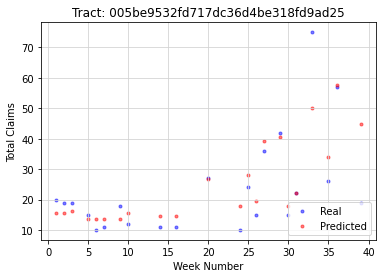

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
6,1,0,0,0,0,0,0,0,0,20,15.4
7,2,0,0,0,0,0,0,0,0,19,15.4
8,3,0,0,10,0,0,0,0,19,19,16.3
9,5,0,0,0,0,0,0,0,15,15,13.6
10,6,0,0,0,0,0,0,0,10,10,13.6
11,7,0,0,0,0,0,0,0,11,11,13.6
13,9,0,0,0,0,0,0,0,18,18,13.6
14,10,0,0,0,0,0,0,0,0,12,15.4
15,14,0,0,0,0,0,0,0,0,11,14.5
16,16,0,0,0,0,0,0,0,0,11,14.5


In [92]:
predict_claims('005be9532fd717dc36d4be318fd9ad25',39)

In [93]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid].copy()
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    data.loc[len(data)] = [uuid, week, data.total_claims.median(), 0,0,0,0,0,0,0,0]
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    X
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

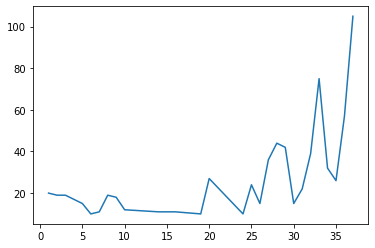

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1028955958.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1028955958.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['prediction'] = predictions.tolist()


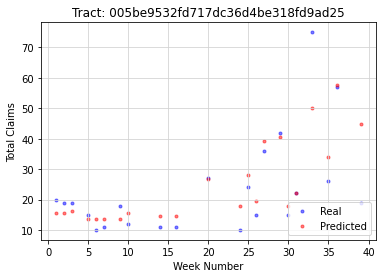

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
6,1,0,0,0,0,0,0,0,0,20,15.4
7,2,0,0,0,0,0,0,0,0,19,15.4
8,3,0,0,10,0,0,0,0,19,19,16.3
9,5,0,0,0,0,0,0,0,15,15,13.6
10,6,0,0,0,0,0,0,0,10,10,13.6
11,7,0,0,0,0,0,0,0,11,11,13.6
13,9,0,0,0,0,0,0,0,18,18,13.6
14,10,0,0,0,0,0,0,0,0,12,15.4
15,14,0,0,0,0,0,0,0,0,11,14.5
16,16,0,0,0,0,0,0,0,0,11,14.5


In [94]:
predict_claims('005be9532fd717dc36d4be318fd9ad25',39)

In [95]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid].copy()
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    data.loc[len(data.index)] = [uuid, week, data.total_claims.median(), 0,0,0,0,0,0,0,0]
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    X
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

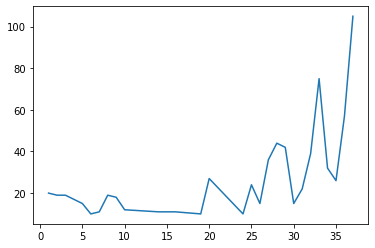

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1704491479.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1704491479.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['prediction'] = predictions.tolist()


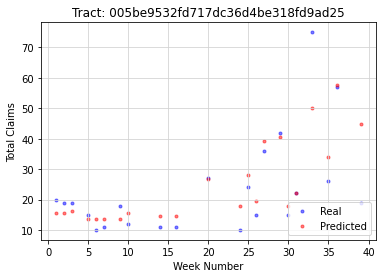

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
6,1,0,0,0,0,0,0,0,0,20,15.4
7,2,0,0,0,0,0,0,0,0,19,15.4
8,3,0,0,10,0,0,0,0,19,19,16.3
9,5,0,0,0,0,0,0,0,15,15,13.6
10,6,0,0,0,0,0,0,0,10,10,13.6
11,7,0,0,0,0,0,0,0,11,11,13.6
13,9,0,0,0,0,0,0,0,18,18,13.6
14,10,0,0,0,0,0,0,0,0,12,15.4
15,14,0,0,0,0,0,0,0,0,11,14.5
16,16,0,0,0,0,0,0,0,0,11,14.5


In [96]:
predict_claims('005be9532fd717dc36d4be318fd9ad25',39)

In [97]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid].copy()
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    new = pd.DataFrame({'uu_id':uuid, 'week_number' = 39, 'total_claims': data.total_claims.median(), 'edu_8th_or_less':0, 'edu_grades_9_11'= 0, 'edu_hs_grad_equiv':0, 'edu_post_hs':0,
                        'race_amerindian':0, 'race_asian':0, 'race_black':0, 'race_white':0})
    data = data.append(new, ignore_index = True)
    
    data
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

SyntaxError: invalid syntax (818874044.py, line 6)

In [98]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid].copy()
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    new = pd.DataFrame({'uu_id':uuid, 'week_number': 39, 'total_claims': data.total_claims.median(), 'edu_8th_or_less':0, 'edu_grades_9_11'= 0, 'edu_hs_grad_equiv':0, 'edu_post_hs':0,
                        'race_amerindian':0, 'race_asian':0, 'race_black':0, 'race_white':0})
    data = data.append(new, ignore_index = True)
    
    data
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

SyntaxError: invalid syntax (2915387746.py, line 6)

In [99]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid].copy()
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    new = pd.DataFrame({'uu_id':uuid, 'week_number': 39, 'total_claims': data.total_claims.median(), 'edu_8th_or_less':0, 'edu_grades_9_11': 0, 'edu_hs_grad_equiv':0, 'edu_post_hs':0,
                        'race_amerindian':0, 'race_asian':0, 'race_black':0, 'race_white':0})
    data = data.append(new, ignore_index = True)
    
    data
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

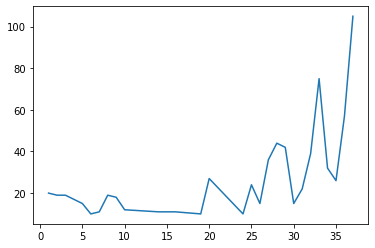

ValueError: If using all scalar values, you must pass an index

In [100]:
predict_claims('005be9532fd717dc36d4be318fd9ad25',39)

In [101]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid].copy()
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    new = pd.DataFrame({'uu_id':uuid, 'week_number': 39, 'total_claims': data.total_claims.median(), 'edu_8th_or_less':0, 'edu_grades_9_11': 0, 'edu_hs_grad_equiv':0, 'edu_post_hs':0,
                        'race_amerindian':0, 'race_asian':0, 'race_black':0, 'race_white':0,, index=[0]})
    data = data.append(new, ignore_index = True)
    
    data
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

SyntaxError: invalid syntax (1854563862.py, line 7)

In [102]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid].copy()
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    new = pd.DataFrame({'uu_id':uuid, 'week_number': 39, 'total_claims': data.total_claims.median(), 'edu_8th_or_less':0, 'edu_grades_9_11': 0, 'edu_hs_grad_equiv':0, 'edu_post_hs':0,
                        'race_amerindian':0, 'race_asian':0, 'race_black':0, 'race_white':0, index=[0]})
    data = data.append(new, ignore_index = True)
    
    data
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

SyntaxError: invalid syntax (1626274501.py, line 7)

In [103]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid].copy()
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    new = pd.DataFrame({'uu_id':uuid, 'week_number': 39, 'total_claims': data.total_claims.median(), 'edu_8th_or_less':0, 'edu_grades_9_11': 0, 'edu_hs_grad_equiv':0, 'edu_post_hs':0,
                        'race_amerindian':0, 'race_asian':0, 'race_black':0, 'race_white':0}, index=[0])
    data = data.append(new, ignore_index = True)
    
    data
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

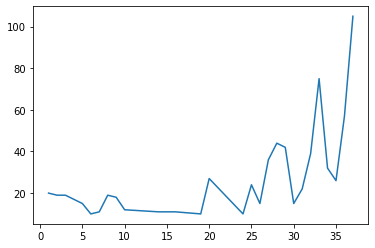

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/4117404465.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new, ignore_index = True)
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/4117404465.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/4117404465.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

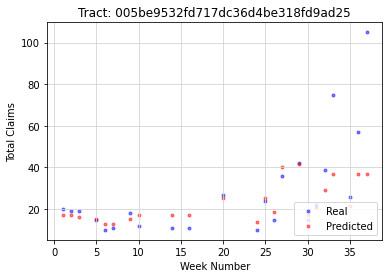

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
0,1,0,0,0,0,0,0,0,0,20.0,17.2
1,2,0,0,0,0,0,0,0,0,19.0,17.2
2,3,0,0,10,0,0,0,0,19,19.0,16.1
3,5,0,0,0,0,0,0,0,15,15.0,15.2
4,6,0,0,0,0,0,0,0,10,10.0,12.7
5,7,0,0,0,0,0,0,0,11,11.0,12.7
7,9,0,0,0,0,0,0,0,18,18.0,15.2
8,10,0,0,0,0,0,0,0,0,12.0,17.2
9,14,0,0,0,0,0,0,0,0,11.0,17.2
10,16,0,0,0,0,0,0,0,0,11.0,17.2


In [104]:
predict_claims('005be9532fd717dc36d4be318fd9ad25',39)

In [109]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    new = pd.DataFrame({'uu_id':uuid, 'week_number': 39, 'total_claims': data.total_claims.median(), 'edu_8th_or_less':0, 'edu_grades_9_11': 0, 'edu_hs_grad_equiv':0, 'edu_post_hs':0,
                        'race_amerindian':0, 'race_asian':0, 'race_black':0, 'race_white':0}, index=[0])
    data = data.append(new, ignore_index = True)
    
    data
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

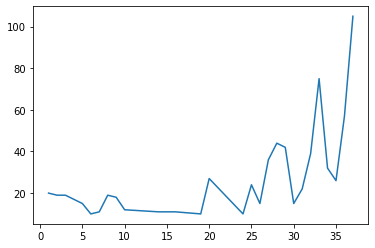

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1768875699.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new, ignore_index = True)
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1768875699.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1768875699.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

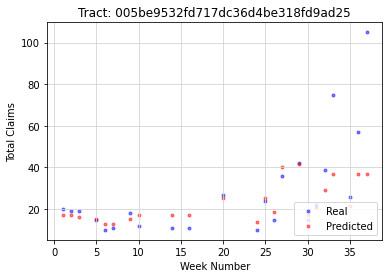

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
0,1,0,0,0,0,0,0,0,0,20.0,17.2
1,2,0,0,0,0,0,0,0,0,19.0,17.2
2,3,0,0,10,0,0,0,0,19,19.0,16.1
3,5,0,0,0,0,0,0,0,15,15.0,15.2
4,6,0,0,0,0,0,0,0,10,10.0,12.7
5,7,0,0,0,0,0,0,0,11,11.0,12.7
7,9,0,0,0,0,0,0,0,18,18.0,15.2
8,10,0,0,0,0,0,0,0,0,12.0,17.2
9,14,0,0,0,0,0,0,0,0,11.0,17.2
10,16,0,0,0,0,0,0,0,0,11.0,17.2


In [110]:
predict_claims('005be9532fd717dc36d4be318fd9ad25',39)

In [111]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    new = pd.DataFrame({'uu_id':uuid, 'week_number': 39, 'total_claims': data.total_claims.median(), 'edu_8th_or_less':0, 'edu_grades_9_11': 0, 'edu_hs_grad_equiv':0, 'edu_post_hs':0,
                        'race_amerindian':0, 'race_asian':0, 'race_black':0, 'race_white':0}, index=[0])
    data = data.append(new, ignore_index = True, inplace=True)
    
    data
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

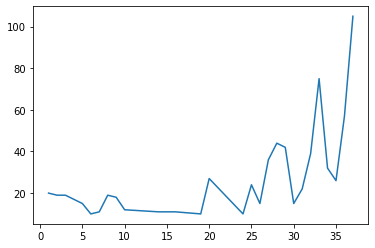

TypeError: append() got an unexpected keyword argument 'inplace'

In [112]:
predict_claims('005be9532fd717dc36d4be318fd9ad25',39)

In [113]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    new = pd.DataFrame({'uu_id':uuid, 'week_number': 39, 'total_claims': data.total_claims.median(), 'edu_8th_or_less':0, 'edu_grades_9_11': 0, 'edu_hs_grad_equiv':0, 'edu_post_hs':0,
                        'race_amerindian':0, 'race_asian':0, 'race_black':0, 'race_white':0}, index=[0])
    data = data.append(new, ignore_index = True)
    
    data
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

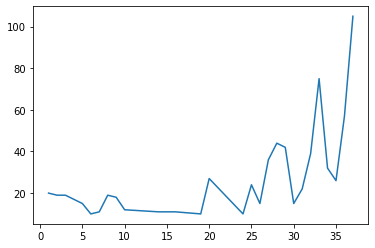

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1768875699.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new, ignore_index = True)
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1768875699.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/1768875699.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

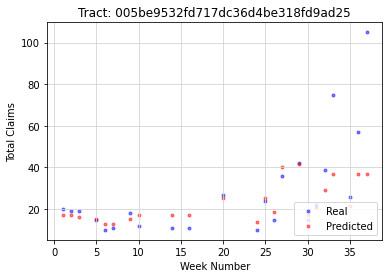

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
0,1,0,0,0,0,0,0,0,0,20.0,17.2
1,2,0,0,0,0,0,0,0,0,19.0,17.2
2,3,0,0,10,0,0,0,0,19,19.0,16.1
3,5,0,0,0,0,0,0,0,15,15.0,15.2
4,6,0,0,0,0,0,0,0,10,10.0,12.7
5,7,0,0,0,0,0,0,0,11,11.0,12.7
7,9,0,0,0,0,0,0,0,18,18.0,15.2
8,10,0,0,0,0,0,0,0,0,12.0,17.2
9,14,0,0,0,0,0,0,0,0,11.0,17.2
10,16,0,0,0,0,0,0,0,0,11.0,17.2


In [114]:
predict_claims('005be9532fd717dc36d4be318fd9ad25',39)

In [115]:
def predict_claims(uuid, week):
    org = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    new = pd.DataFrame({'uu_id':uuid, 'week_number': 39, 'total_claims': data.total_claims.median(), 'edu_8th_or_less':0, 'edu_grades_9_11': 0, 'edu_hs_grad_equiv':0, 'edu_post_hs':0,
                        'race_amerindian':0, 'race_asian':0, 'race_black':0, 'race_white':0}, index=[0])
    data = pd.concat(org, new, ignore_index=True)
    
    data
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

In [116]:
predict_claims('005be9532fd717dc36d4be318fd9ad25',39)

UnboundLocalError: local variable 'data' referenced before assignment

In [117]:
def predict_claims(uuid, week):
    org = unemployment_data[unemployment_data.uu_id == uuid]
    # plt.plot(data.week_number, data.total_claims)
    # plt.show()
    
    new = pd.DataFrame({'uu_id':uuid, 'week_number': 39, 'total_claims': data.total_claims.median(), 'edu_8th_or_less':0, 'edu_grades_9_11': 0, 'edu_hs_grad_equiv':0, 'edu_post_hs':0,
                        'race_amerindian':0, 'race_asian':0, 'race_black':0, 'race_white':0}, index=[0])
    data = pd.concat(org, new, ignore_index=True)
    
    data
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

In [118]:
predict_claims('005be9532fd717dc36d4be318fd9ad25',39)

UnboundLocalError: local variable 'data' referenced before assignment

In [119]:
def predict_claims(uuid, week):
    org = unemployment_data[unemployment_data.uu_id == uuid]
    # plt.plot(data.week_number, data.total_claims)
    # plt.show()
    
    new = pd.DataFrame({'uu_id':uuid, 'week_number': 39, 'total_claims': org.total_claims.median(), 'edu_8th_or_less':0, 'edu_grades_9_11': 0, 'edu_hs_grad_equiv':0, 'edu_post_hs':0,
                        'race_amerindian':0, 'race_asian':0, 'race_black':0, 'race_white':0}, index=[0])
    data = pd.concat(org, new, ignore_index=True)
    
    data
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

In [120]:
predict_claims('005be9532fd717dc36d4be318fd9ad25',39)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/2655426485.py:8: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat(org, new, ignore_index=True)


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [121]:
def predict_claims(uuid, week):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    plt.plot(data.week_number, data.total_claims)
    plt.show()
    
    new = pd.DataFrame({'uu_id':uuid, 'week_number': 39, 'total_claims': data.total_claims.median(), 'edu_8th_or_less':0, 'edu_grades_9_11': 0, 'edu_hs_grad_equiv':0, 'edu_post_hs':0,
                        'race_amerindian':0, 'race_asian':0, 'race_black':0, 'race_white':0}, index=[0])

    data
    
    X = data.drop(['uu_id','total_claims'], axis = 1)
    y = data[['total_claims']]
    
    
    
    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 101)
    # Train the Model

    regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    
    predictions = regr.predict(X_test)
    
    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    
    x_axis = X_test.week_number
    
    plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
    plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

    plt.xlabel('Week Number')
    plt.ylabel('Total Claims')
    plt.title('Tract: '+uuid)

    plt.grid(color = '#D3D3D3', linestyle = 'solid')

    plt.legend(loc = 'lower right')

    plt.show()
    
    
    return result.sort_values(by = 'week_number')

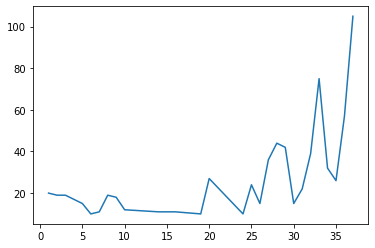

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/189399864.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['total_claims'] = y_test
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_4680/189399864.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['prediction'] = predictions.tolist()


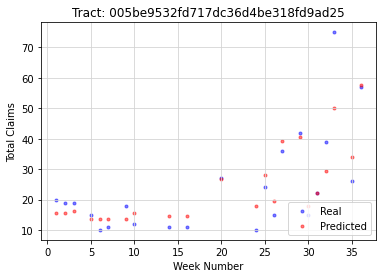

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,total_claims,prediction
6,1,0,0,0,0,0,0,0,0,20,15.4
7,2,0,0,0,0,0,0,0,0,19,15.4
8,3,0,0,10,0,0,0,0,19,19,16.3
9,5,0,0,0,0,0,0,0,15,15,13.6
10,6,0,0,0,0,0,0,0,10,10,13.6
11,7,0,0,0,0,0,0,0,11,11,13.6
13,9,0,0,0,0,0,0,0,18,18,13.6
14,10,0,0,0,0,0,0,0,0,12,15.4
15,14,0,0,0,0,0,0,0,0,11,14.5
16,16,0,0,0,0,0,0,0,0,11,14.5


In [122]:
predict_claims('005be9532fd717dc36d4be318fd9ad25',39)